# IMPORTS

In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Exercise 1

Can you come up with grammatical sentences that have probably never been uttered before? (Take turns with a partner.) What does this tell you about human language?

The word "abradabraXXXYYY" is my hand-crafted word just a moment ago.

# Exercise 2 (Review)

Recall Strunk and White's prohibition against sentence-initial however used to mean "although". Do a web search for however used at the start of the sentence. How widely used is this construction?

# Exercise 3

Consider the sentence *Kim arrived or Dana left and everyone cheered*. Write down the parenthesized forms to show the relative scope of and and or. Generate tree structures corresponding to both of these interpretations.

1. (Kim arrived or Dana left) and everyone cheered
2. Kim arrived or (Dana left and everyone cheered)

In [4]:
grammar = nltk.CFG.fromstring("""
    S   -> CS C CSS | CSS C CS
    CSS -> CS | CS C CS
    CS  -> NP VP
    NP  -> N
    VP  -> V
    C   -> 'and' | 'or'
    V   -> 'arrived' | 'left' | 'cheered'
    N   -> 'Kim' | 'Dana' | 'everyone'
""")

In [5]:
parser = nltk.RecursiveDescentParser(grammar)

In [6]:
sent = 'Kim arrived or Dana left and everyone cheered'.split()

In [8]:
for tree in parser.parse(sent):
    tree.draw()

# Exercise 4

The Tree class implements a variety of other useful methods. See the Tree help documentation for more details, i.e. import the Tree class and then type help(Tree).

In [9]:
from nltk.tree import Tree

In [10]:
help(Tree)

Help on class Tree in module nltk.tree:

class Tree(builtins.list)
 |  Tree(node, children=None)
 |  
 |  A Tree represents a hierarchical grouping of leaves and subtrees.
 |  For example, each constituent in a syntax tree is represented by a single Tree.
 |  
 |  A tree's children are encoded as a list of leaves and subtrees,
 |  where a leaf is a basic (non-tree) value; and a subtree is a
 |  nested Tree.
 |  
 |      >>> from nltk.tree import Tree
 |      >>> print(Tree(1, [2, Tree(3, [4]), 5]))
 |      (1 2 (3 4) 5)
 |      >>> vp = Tree('VP', [Tree('V', ['saw']),
 |      ...                  Tree('NP', ['him'])])
 |      >>> s = Tree('S', [Tree('NP', ['I']), vp])
 |      >>> print(s)
 |      (S (NP I) (VP (V saw) (NP him)))
 |      >>> print(s[1])
 |      (VP (V saw) (NP him))
 |      >>> print(s[1,1])
 |      (NP him)
 |      >>> t = Tree.fromstring("(S (NP I) (VP (V saw) (NP him)))")
 |      >>> s == t
 |      True
 |      >>> t[1][1].set_label('X')
 |      >>> t[1][1].label()
 

# Exercise 5

In this exercise you will manually construct some parse trees.

1. Write code to produce two trees, one for each reading of the phrase *old men and women.*

In [72]:
grammar = nltk.CFG.fromstring("""
    S   -> NP VP | NP
    VP  -> V NP | VP NP
    NP  -> N | Adj NP | Det NP | NP C NP
    
    V   -> 'saw'
    C   -> 'and'
    Det -> 'The' | 'a'
    Adj -> 'old' | 'last'
    N   -> 'men' | 'women' | 'woman' | 'man' | 'Thursday'
""")

In [73]:
parser = nltk.ChartParser(grammar)

In [74]:
sent = 'old men and women'.split()

In [75]:
for tree in parser.parse(sent):
    tree.draw()

2. Encode any of the trees presented in this chapter as a labeled bracketing and use nltk.Tree() to check that it is well-formed. Now use draw() to display the tree.

In [76]:
tree = Tree.fromstring('(S (NP Mary) (VP (V saw) (NP (Det a) (N dog))))')
tree.draw()

3. As in (a) above, draw a tree for *The woman saw a man last Thursday.*

In [77]:
sent = 'The woman saw a man last Thursday'.split()

In [78]:
for tree in parser.parse(sent):
    tree.draw()

# Exercise 6

Write a recursive function to traverse a tree and return the depth of the tree, such that a tree with a single node would have depth zero. (Hint: the depth of a subtree is the maximum depth of its children, plus one.)

In [41]:
t0 = nltk.Tree('A', [])
t1 = nltk.Tree('A', ['B', 'C'])
t2 = nltk.Tree('A', ['B', 'C', nltk.Tree('D', ['d1', 'd2'])])

In [42]:
def get_tree_height(tree):
    return tree.height() - 1

In [43]:
for t in [t0, t1, t2]:
    print(get_tree_height(t))
    t.draw()

0
1
2


# Exercise 7

Analyze the A.A. Milne sentence about Piglet, by underlining all of the sentences it contains then replacing these with S (e.g. the first sentence becomes *S when S*). Draw a tree structure for this "compressed" sentence. What are the main syntactic constructions used for building such a long sentence?

[You can imagine Piglet's joy] when [at last the ship came in sight of him]. [In after-years he liked to think] that [he had been in Very Great Danger during the Terrible Flood], but [the only danger he had really been in] [was the last half-hour of his imprisonment], when [Owl, [who had just flown up], sat on a branch of his tree to comfort him, and told him a very long story about an aunt] [who had once laid a seagull's egg by mistake], and [the story went on and on, rather like this sentence], until [Piglet who was listening out of his window without much hope, went to sleep quietly and naturally, slipping slowly out of the window towards the water] until [he was only hanging on by his toes], at which moment, luckily, [a sudden loud squawk from Owl], [which was really part of the story], [being what his aunt said, woke the Piglet up and just gave him time to jerk himself back into safety and say, "[How interesting, and did she?]" when — [well, you can imagine his joy ] when [at last he saw the good ship], [Brain of Pooh (Captain, C. Robin; 1st Mate, P. Bear) coming over the sea to rescue him...]

**S** when **S**. **S** that **S** but **S** when **S** **S** and **S** until **S** until **S** at which moment **S** **S** **S** **S** when **S** when **S** **S**.

In [58]:
grammar = nltk.CFG.fromstring("""
    S   -> 'S' | S S | S C S
    C   -> 'that' | 'but' | 'when' | 'and' | 'until'
""")

In [59]:
sent = 'S that S but S when S S and S until S until S S S S S when S when S S'.split()

In [60]:
parser = nltk.ChartParser(grammar)

In [61]:
for tree in parser.parse(sent):
    tree.draw()
    break

# Exercise 8

In the recursive descent parser demo, experiment with changing the sentence to be parsed by selecting Edit Text in the Edit menu.

In [68]:
nltk.app.rdparser()  # the man in the park saw a dog 

# Exercise 9

Can the grammar in grammar1 be used to describe sentences that are more than 20 words in length?

In [97]:
grammar = nltk.CFG.fromstring("""
    S -> NP VP
    VP -> V NP | V NP PP
    PP -> P NP
    V -> "saw" | "ate" | "walked"
    NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
    Det -> "a" | "an" | "the" | "my"
    N -> "man" | "dog" | "cat" | "telescope" | "park"
    P -> "in" | "on" | "by" | "with"
""")

In [98]:
sent = 'a cat on a dog with a man in a park saw a cat on a dog with a man in a park on a telescope'.split()
len(sent)

26

In [99]:
parser = nltk.RecursiveDescentParser(grammar)

In [101]:
for tree in parser.parse(sent):
    tree.draw()
    break

# Exercise 10

Use the graphical chart-parser interface to experiment with different rule invocation strategies. Come up with your own strategy that you can execute manually using the graphical interface. Describe the steps, and report any efficiency improvements it has (e.g. in terms of the size of the resulting chart). Do these improvements depend on the structure of the grammar? What do you think of the prospects for significant performance boosts from cleverer rule invocation strategies?

In [ ]:
nltk.app.chartparser()

# Exercise 11

With pen and paper, manually trace the execution of a recursive descent parser and a shift-reduce parser, for a CFG you have already seen, or one of your own devising.

In [103]:
nltk.app.rdparser()

In [ ]:
nltk.app.srparser()

# Exercise 12

We have seen that a chart parser adds but never removes edges from a chart. Why?

I think that these edges may be useful in the future.

# Exercise 13

Consider the sequence of words: *Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo*. This is a grammatically correct sentence, as explained at http://en.wikipedia.org/wiki/Buffalo_buffalo_Buffalo_buffalo_buffalo_buffalo_Buffalo_buffalo. Consider the tree diagram presented on this Wikipedia page, and write down a suitable grammar. Normalize case to lowercase, to simulate the problem that a listener has when hearing this sentence. Can you find other parses for this sentence? How does the number of parse trees grow as the sentence gets longer? (More examples of these sentences can be found at http://en.wikipedia.org/wiki/List_of_homophonous_phrases).

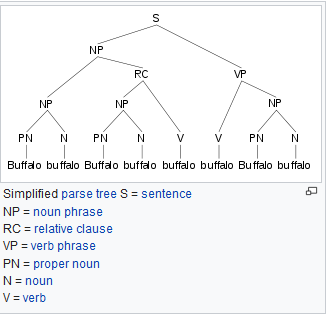

In [154]:
raw_sent = "Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo"

In [155]:
grammar = nltk.CFG.fromstring("""
    S   -> NP VP
    
    VP  -> V NP
    RC  -> NP V
    NP  -> PN N | NP RC

    PN  -> 'Buffalo'
    N   -> 'buffalo'
    V   -> 'buffalo'
""")
parser = nltk.ChartParser(grammar)

In [156]:
for tree in parser.parse(raw_sent.split()):
    tree.draw()

In [157]:
grammar = nltk.CFG.fromstring("""
    S   -> NP VP
    
    VP  -> V NP
    RC  -> NP V
    NP  -> PN N | NP RC

    PN  -> 'buffalo'
    N   -> 'buffalo'
    V   -> 'buffalo'
""")
parser = nltk.ChartParser(grammar)

In [158]:
for tree in parser.parse(raw_sent.lower().split()):
    tree.draw()

In [185]:
n = 45
num_parses = [len(list(parser.parse(['buffalo'] * i))) for i in range(n)]

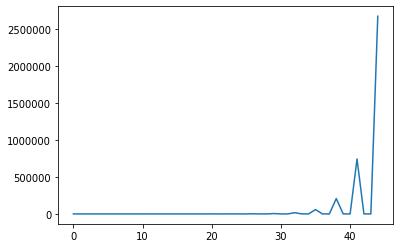

In [186]:
plt.plot(num_parses)
plt.show()

In [188]:
nz_num_parses = [n for n in num_parses if n]
nz_num_parses  # the Catalan numbers

[1, 2, 5, 14, 42, 132, 429, 1430, 4862, 16796, 58786, 208012, 742900, 2674440]

# Exercise 14

You can modify the grammar in the recursive descent parser demo by selecting Edit Grammar in the Edit menu. Change the second expansion production, namely NP -> Det N PP, to NP -> NP
PP. Using the Step button, try to build a parse tree. What happens?

In [ ]:
nltk.app.rdparser()

As soon as the parser uses NP -> NP PP production it gets stuck. It is expected behavior because Recursive Descent parser doesn't work with left-recursive production rules.

# Exercise 15

Extend the grammar in grammar2 with productions that expand prepositions as intransitive, transitive and requiring a PP complement. Based on these productions, use the method of the preceding exercise to draw a tree for the sentence *Lee ran away home*.

In [20]:
grammar2 = nltk.CFG.fromstring("""
    S  -> NP VP
    NP -> Det Nom | PropN | Nom
    Nom -> Adj Nom | N
    VP -> V Adj | V NP | V S | V NP PP | V PTrans NP | V PIntrans | V PIntrans
    PP -> PPP NP
    PropN -> 'Buster' | 'Chatterer' | 'Joe' | 'Lee'
    Det -> 'the' | 'a'
    N -> 'bear' | 'squirrel' | 'tree' | 'fish' | 'log' | 'home'
    Adj  -> 'angry' | 'frightened' |  'little' | 'tall'
    V ->  'chased'  | 'saw' | 'said' | 'thought' | 'was' | 'put' | 'ran'
    PTrans    -> 'away' | 'in' | 'out'
    PIntrans  -> 'away' | 'around' | 'in'
    PPP       -> 'on' | 'to' | 'from' | 'in' | 'into' | 'for'
""")

In [21]:
sent = 'Lee ran away home'.split()

In [22]:
parser = nltk.RecursiveDescentParser(grammar2)

In [23]:
for tree in parser.parse(sent):
    tree.draw()

# Exercise 16

Pick some common verbs and complete the following tasks:

1. Write a program to find those verbs in the Prepositional Phrase Attachment Corpus nltk.corpus.ppattach. Find any cases where the same verb exhibits two different attachments, but where the first noun, or second noun, or preposition, stay unchanged (as we saw in our discussion of syntactic ambiguity in 2).

In [3]:
from collections import defaultdict
from nltk.corpus import ppattach

In [4]:
entries = nltk.corpus.ppattach.attachments('training')

In [5]:
table = defaultdict(set)
for entry in entries:
    verb = entry.verb.lower()
    for name, field in zip(['NOUN1', 'NOUN2', 'PREP'],
                           [entry.noun1, entry.noun2, entry.prep]):
        key_verb_field = "VERB: {}, {}: {}".format(verb, name, field.lower())
        table[key_verb_field].add(entry.attachment)

In [6]:
ambiguity_table = {key: value for key, value in table.items() if len(value) > 1}

In [7]:
for key in sorted(ambiguity_table)[:50]:
    print(key, ambiguity_table[key])

VERB: 's, NOUN1: news {'V', 'N'}
VERB: 's, NOUN1: nothing {'V', 'N'}
VERB: 's, NOUN1: one {'V', 'N'}
VERB: 's, NOUN1: place {'V', 'N'}
VERB: 's, NOUN1: sense {'V', 'N'}
VERB: 's, NOUN1: sort {'V', 'N'}
VERB: 's, NOUN2: market {'V', 'N'}
VERB: 's, PREP: against {'V', 'N'}
VERB: 's, PREP: by {'V', 'N'}
VERB: 's, PREP: for {'V', 'N'}
VERB: 's, PREP: from {'V', 'N'}
VERB: 's, PREP: in {'V', 'N'}
VERB: 's, PREP: on {'V', 'N'}
VERB: 's, PREP: to {'V', 'N'}
VERB: 's, PREP: with {'V', 'N'}
VERB: a-includes, NOUN1: gain {'V', 'N'}
VERB: absorb, NOUN1: increases {'V', 'N'}
VERB: absorb, PREP: in {'V', 'N'}
VERB: accept, NOUN1: risk {'V', 'N'}
VERB: accept, NOUN2: order {'V', 'N'}
VERB: accept, PREP: in {'V', 'N'}
VERB: accepted, NOUN1: bid {'V', 'N'}
VERB: accepted, NOUN1: billion {'V', 'N'}
VERB: accumulating, NOUN1: stake {'V', 'N'}
VERB: accumulating, PREP: in {'V', 'N'}
VERB: accuse, PREP: of {'V', 'N'}
VERB: accused, PREP: of {'V', 'N'}
VERB: achieved, PREP: in {'V', 'N'}
VERB: acquire, NOU

In [8]:
for entry in entries:
    if entry.verb == 'acquire' and entry.noun1 == 'million':
        print(entry)

PPAttachment(sent='27846', verb='acquire', noun1='million', prep='of', noun2='common', attachment='N')
PPAttachment(sent='27846', verb='acquire', noun1='million', prep='at', noun2='price', attachment='V')


2. Devise CFG grammar productions to cover some of these cases.

In [24]:
sent1 = 'acquire million of common'.split()
sent2 = 'acquire million at price'.split()

In [25]:
grammar = nltk.CFG.fromstring("""
    S -> VP | VP NP
    
    VP -> V | V N PV N
    NP -> N PN N
    
    V -> 'acquire'
    N -> 'million' | 'price' | 'common'
    PN -> 'of'
    PV -> 'at'
""")

In [26]:
parser = nltk.RecursiveDescentParser(grammar)

In [27]:
for sent in [sent1, sent2]:
    for tree in parser.parse(sent):
        tree.draw()

# Exercise 17

Write a program to compare the efficiency of a top-down chart parser compared with a recursive descent parser (4). Use the same grammar and input sentences for both. Compare their performance using the timeit module (see 4.7 for an example of how to do this).

In [44]:
grammar = nltk.CFG.fromstring("""
    S   -> CS C CSS | CSS C CS
    CSS -> CS | CS C CS
    CS  -> NP VP
    NP  -> N
    VP  -> V
    C   -> 'and' | 'or'
    V   -> 'arrived' | 'left' | 'cheered'
    N   -> 'Kim' | 'Dana' | 'everyone'
""")

In [45]:
rd_parser = nltk.RecursiveDescentParser(grammar)
td_parser = nltk.TopDownChartParser(grammar)

In [46]:
sent = 'Kim arrived or Dana left and everyone cheered'.split()

In [65]:
%%timeit
trees = list(rd_parser.parse(sent))
len(trees)

28.5 ms ± 2.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [66]:
%%timeit
trees = list(td_parser.parse(sent))
len(trees)

10.1 ms ± 84.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Exercise 18

Compare the performance of the top-down, bottom-up, and left-corner parsers using the same grammar and three grammatical test sentences. Use timeit to log the amount of time each parser takes on the same sentence. Write a function that runs all three parsers on all three sentences, and prints a 3-by-3 grid of times, as well as row and column totals. Discuss your findings.

In [20]:
from timeit import Timer

In [21]:
grammar = nltk.CFG.fromstring("""
    S -> NP VP
    VP -> V NP | V NP PP
    PP -> P NP
    V -> "saw" | "ate" | "walked"
    NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
    Det -> "a" | "an" | "the" | "my"
    N -> "man" | "dog" | "cat" | "telescope" | "park"
    P -> "in" | "on" | "by" | "with"
""")

In [22]:
sents = [
    "Mary saw Bob".split(),
    "Mary saw a dog".split(),
    "John saw a cat".split()
]

In [23]:
parsers = [
    nltk.RecursiveDescentParser(grammar),
    nltk.ShiftReduceParser(grammar),
    nltk.LeftCornerChartParser(grammar),
    nltk.TopDownChartParser(grammar),
    nltk.BottomUpChartParser(grammar),
    nltk.ChartParser(grammar)
]

In [27]:
def compare_parsers(parsers, sents, n=100):
    time_results = pd.DataFrame(
        data=[
            (' '.join(sent), 
             parser.__class__.__name__, 
             Timer(lambda: list(parser.parse(sent))).timeit(n))
            for sent in sents
            for parser in parsers
        ],
        columns=['sent', 'parser', 'time']
    )
    time_results = (
        time_results
        .pivot_table(
            values='time', 
            index='parser', 
            columns='sent', 
            aggfunc='sum', 
            margins=True, 
            margins_name='Total'
        )
        .sort_values('Total')
    )
    
    return time_results

In [28]:
compare_parsers(parsers, sents)

sent,John saw a cat,Mary saw Bob,Mary saw a dog,Total
parser,,,,
ShiftReduceParser,0.120243,0.068394,0.102367,0.291004
LeftCornerChartParser,0.273938,0.148386,0.231106,0.653429
ChartParser,0.243853,0.166485,0.251794,0.662132
BottomUpChartParser,0.398370,0.282864,0.408533,1.089767
TopDownChartParser,0.436496,0.418167,0.446744,1.301407
RecursiveDescentParser,1.736205,1.018486,1.730438,4.485129
Total,3.209105,2.102781,3.170982,8.482868


# Exercise 19

Read up on "garden path" sentences. How might the computational work of a parser relate to the difficulty humans have with processing these sentences? http://en.wikipedia.org/wiki/Garden_path_sentence

According to Wikipedia this type of sentences might be useful for testing the capabilities of artificial intelligence systems.

# Exercise 20

To compare multiple trees in a single window, we can use the draw_trees() method. Define some trees and try it out:

In [34]:
from nltk.draw.tree import draw_trees

In [35]:
t0 = nltk.Tree('A', ['X', nltk.Tree('Y', ['T']), 'Z'])
t1 = nltk.Tree('A', ['B', 'C'])
t2 = nltk.Tree('A', ['B', 'C', nltk.Tree('D', ['d1', 'd2'])])

In [36]:
draw_trees(t0, t1, t2)

# Exercise 21

Using tree positions, list the subjects of the first 100 sentences in the Penn treebank; to make the results easier to view, limit the extracted subjects to subtrees whose height is 2.

In [3]:
from nltk.corpus import treebank
from nltk.draw.tree import draw_trees

In [6]:
subjects = [subtree 
            for tree in treebank.parsed_sents()[:100]
            for subtree in tree.subtrees()
            if ('SBJ' in subtree.label()) 
            and ((subtree.height() - 1) == 3)]

In [8]:
draw_trees(*subjects)

# Exercise 22

Inspect the Prepositional Phrase Attachment Corpus and try to suggest some factors that influence PP attachment.

<a href="#Exercise-16">Go to Exercise #16</a>

# Exercise 23 (Review)

In this section we claimed that there are linguistic regularities that cannot be described simply in terms of n-grams. Consider the following sentence, particularly the position of the phrase *in his turn*. Does this illustrate a problem for an approach based on n-grams?

*What was more, the in his turn somewhat youngish Nikolay Parfenovich also turned out to be the only person in the entire world to acquire a sincere liking to our "discriminated-against" public procurator*. (Dostoevsky: The Brothers Karamazov)

# Exercise 24

Write a recursive function that produces a nested bracketing for a tree, leaving out the leaf nodes, and displaying the non-terminal labels after their subtrees. So the above example about Pierre Vinken would produce: [[[NNP NNP]NP , [ADJP [CD NNS]NP JJ]ADJP ,]NP-SBJ MD [VB [DT NN]NP [IN [DT JJ NN]NP]PP-CLR [NNP CD]NP-TMP]VP .]S Consecutive categories should be separated by space.

In [3]:
from nltk.corpus import treebank

In [4]:
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t.draw()

In [7]:
def nested_bracketing(tree):
    if len(tree) == 1 and isinstance(tree[0], str):
        return tree.label()
    return ''.join([
        '[',
        ' '.join([nested_bracketing(child) for child in tree]),
        ']',
        tree.label()
    ])

In [8]:
nested_bracketing(t)

'[[[NNP NNP]NP , [[CD NNS]NP JJ]ADJP ,]NP-SBJ [MD [VB [DT NN]NP [IN [DT JJ NN]NP]PP-CLR [NNP CD]NP-TMP]VP]VP .]S'

# Exercise 25

Download several electronic books from Project Gutenberg. Write a program to scan these texts for any extremely long sentences. What is the longest sentence you can find? What syntactic construction(s) are responsible for such long sentences?

In [4]:
from nltk.corpus import gutenberg

In [5]:
n_longest_sent = max(gutenberg.sents(), key=len)

In [6]:
len(n_longest_sent)

1378

In [9]:
' '.join(n_longest_sent)

"By the city ' s quadrangular houses -- in log huts , camping with lumber - men , Along the ruts of the turnpike , along the dry gulch and rivulet bed , Weeding my onion - patch or hosing rows of carrots and parsnips , crossing savannas , trailing in forests , Prospecting , gold - digging , girdling the trees of a new purchase , Scorch ' d ankle - deep by the hot sand , hauling my boat down the shallow river , Where the panther walks to and fro on a limb overhead , where the buck turns furiously at the hunter , Where the rattlesnake suns his flabby length on a rock , where the otter is feeding on fish , Where the alligator in his tough pimples sleeps by the bayou , Where the black bear is searching for roots or honey , where the beaver pats the mud with his paddle - shaped tall ; Over the growing sugar , over the yellow - flower ' d cotton plant , over the rice in its low moist field , Over the sharp - peak ' d farm house , with its scallop ' d scum and slender shoots from the gutters 

The most popular structures in this part of the poem 'Song of Myself' by Walt Whitman are:

- Where NP VP NP
- Where NP VP
- Over NP
- NP
- NP and NP
- NP VP

# Exercise 26

Modify the functions init_wfst() and complete_wfst() so that the contents of each cell in the WFST is a set of non-terminal symbols rather than a single non-terminal.

In [123]:
from itertools import product
from collections import defaultdict

In [29]:
groucho_grammar = nltk.CFG.fromstring("""
    S -> NP VP
    PP -> P NP
    NP -> Det N | Det N PP | 'I'
    VP -> V NP | VP PP
    Det -> 'an' | 'my'
    N -> 'elephant' | 'pajamas'
    V -> 'shot'
    P -> 'in'
""")

In [125]:
text = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']

In [126]:
def init_wfst(tokens, grammar):
    numtokens = len(tokens)
    wfst = [[set() for i in range(numtokens)] 
            for j in range(numtokens)]
    for i in range(numtokens):
        for p in grammar.productions(rhs=tokens[i]):
            wfst[i][i].add(p.lhs())
    return wfst

In [127]:
def complete_wfst(wfst, tokens, grammar):
    index = defaultdict(set)
    for p in grammar.productions():
        index[p.rhs()].add(p.lhs())
    numtokens = len(tokens)
    for span in range(1, numtokens):
        for start in range(numtokens-span):
            end = start + span
            for mid in range(start, end):
                nt_s1, nt_s2 = wfst[start][mid], wfst[mid+1][end]
                for rhs in product(nt_s1, nt_s2):
                    if rhs in index:
                        for lhs in index[rhs]:
                            wfst[start][end].add(lhs)
    return wfst

In [128]:
def display(wfst):
    print('\nWFST ' + ' '.join(("%-12d" % i) for i in range(len(wfst))))
    for i in range(len(wfst)):
        print("%d   " % i, end=" ")
        for j in range(len(wfst)):
            print("%-12s" % (wfst[i][j] or '.'), end=" ")
        print()

In [129]:
tokens = "I shot an elephant in my pajamas".split()

In [130]:
wfst0 = init_wfst(tokens, groucho_grammar)

In [131]:
display(wfst0)


WFST 0            1            2            3            4            5            6           
0    {NP}         .            .            .            .            .            .            
1    .            {V}          .            .            .            .            .            
2    .            .            {Det}        .            .            .            .            
3    .            .            .            {N}          .            .            .            
4    .            .            .            .            {P}          .            .            
5    .            .            .            .            .            {Det}        .            
6    .            .            .            .            .            .            {N}          


In [132]:
wfst1 = complete_wfst(wfst0, tokens, groucho_grammar)

In [133]:
display(wfst1)


WFST 0            1            2            3            4            5            6           
0    {NP}         .            .            {S}          .            .            {S}          
1    .            {V}          .            {VP}         .            .            {VP}         
2    .            .            {Det}        {NP}         .            .            .            
3    .            .            .            {N}          .            .            .            
4    .            .            .            .            {P}          .            {PP}         
5    .            .            .            .            .            {Det}        {NP}         
6    .            .            .            .            .            .            {N}          


# Exercise 27

Consider the algorithm in 4.4. Can you explain why parsing context-free grammar is proportional to n3, where n is the length of the input sentence.

There are 3 nested 'for' loops: 
- for changing 'span' parameter
- for changing 'start' index
- for changing 'mid' index from 'start'+1 to 'end'-1

# Exercise 28

Process each tree of the Treebank corpus sample nltk.corpus.treebank and extract the productions with the help of Tree.productions(). Discard the productions that occur only once. Productions with the same left hand side, and similar right hand sides can be collapsed, resulting in an equivalent but more compact set of rules. Write code to output a compact grammar.

In [3]:
from nltk.corpus import treebank

## version 1

In [4]:
cfd = nltk.ConditionalFreqDist(
    (production.lhs(), production.rhs())
    for tree in treebank.parsed_sents()
    for production in tree.productions()
)

In [5]:
index = nltk.Index(
    (lhs, rhs)
    for lhs in cfd.conditions()
    for rhs, count in cfd[lhs].items() 
    if count > 1
)

In [6]:
index = nltk.Index(
    (lhs, ' '.join([repr(c) if isinstance(c, str) 
                    else c.symbol() 
                    for c in rhs]))
    for lhs, rhss in index.items()
    for rhs in rhss
)

In [7]:
grammar_string = '\n'.join([
    "{} -> {}".format(lhs, ' | '.join(rhss))
    for lhs, rhss in index.items()
])

## version 2

In [8]:
fd = nltk.FreqDist(
    production
    for tree in treebank.parsed_sents()
    for production in tree.productions()
)

In [9]:
grammar = nltk.grammar.CFG(
    start=nltk.grammar.Nonterminal('S'),
    productions=[p for p, count in fd.items() if count > 1]
)

# Exercise 29

One common way of defining the subject of a sentence S in English is as *the noun phrase that is the child of S and the sibling of VP*. Write a function that takes the tree for a sentence and returns the subtree corresponding to the subject of the sentence. What should it do if the root node of the tree passed to this function is not S, or it lacks a subject?

In [34]:
def find_subject(tree):
    if tree.label() == 'S':
        i = 0
        np = vp = None
        while i < len(tree) and not (np and vp):
            child = tree[i]
            if not np and child.label().startswith('NP'):
                np = child
            if not vp and child.label().startswith('VP'):
                vp = child
            i += 1
        if not np:
            raise ValueError("There is no any noun phrase")
        if not vp:
            raise ValueError('There is no any verb phrase')
        return np 
    else:
        raise ValueError('Root label is not S!')

In [35]:
t0 = nltk.Tree.fromstring("(S (NP I) (VP (V saw) (NP him)))")
t1 = nltk.Tree.fromstring("(S (VP (V saw) (NP him)))")
t2 = nltk.Tree.fromstring("(S (NP I))")
t3 = nltk.Tree.fromstring("(NONS (NP I) (VP (V saw) (NP him)))")

In [36]:
for i, tree in enumerate([t0, t1, t2, t3]):
    print('Tree {}:'.format(i), end=" ")
    try:
        print(find_subject(tree))
    except Exception as ex:
        print(ex)

Tree 0: (NP I)
Tree 1: There is no any noun phrase
Tree 2: There is no any verb phrase
Tree 3: Root label is not S!
